## Introduction

This notebook was intended to show the nuclear isotope abundance dependent on baryon density. I abandoned it later though. If you want to pick it up, go ahead. No guarantees all rights reserved and you are responsible for your interpretation of all this, etc.

## Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=18)
plt.rcParams['figure.figsize'] = (10.0, 7.0)

## Read data

In [4]:
def read_datathief(fn):
    data = np.loadtxt(fn, converters={0: lambda x: x[:-1]})
    return data[:, 0], data[:, 1]

In [5]:
ab = {}
elems = ['he4', 'd2', 'he3', 'li3']
ab['x_he4'], ab['he4'] = read_datathief('data/abundances/He4.txt')
ab['x_d2'],  ab['d2']  = read_datathief('data/abundances/D2.txt')
ab['x_he3'], ab['he3'] = read_datathief('data/abundances/He3.txt')
ab['x_li3'], ab['li3'] = read_datathief('data/abundances/Li.txt')

In [6]:
ab['li3_c'] = 1.58e-10
ab['li3_c_d'] = 0.3e-10
ab['d2_c'] = 2.53e-5
ab['d2_c_d'] = 0.04e-5
ab['he3_c'] = 1.1e-5
ab['he3_c_d'] = 0.2e-5
ab['he4_c'] = 0.2449
ab['he4_c_d'] = 0.004


## Plots

### All on one

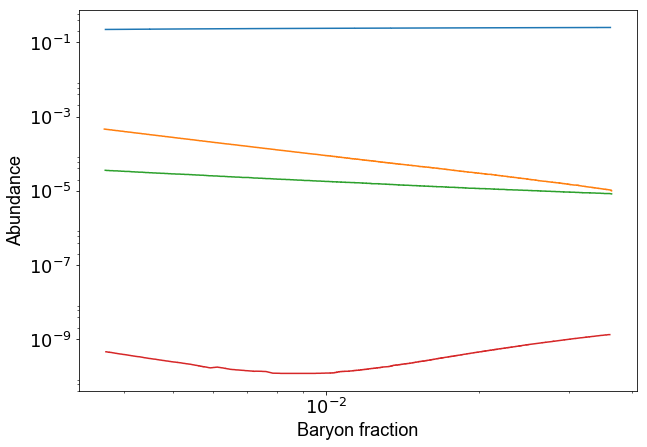

In [7]:
for el in elems:
    plt.plot(ab['x_' + el], ab[el])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Baryon fraction')
plt.ylabel('Abundance')
# plt.ylim(1e-10, 1)

### Fancy plot

(0.004, 0.03)

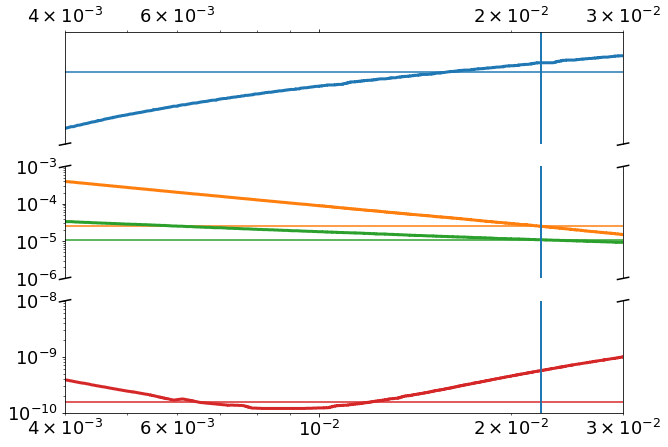

In [8]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
axs = [ax1, ax2, ax3]
c = {el: 'C%d' % i for i, el in enumerate(elems) }
planck_ab = 0.02230
for el in elems:
    for ax in axs:
        ax.plot(ab['x_' + el], ab[el], color=c[el], lw=3)
        ax.axhline(ab[el+'_c'], color=c[el])
        ax.axvline(planck_ab)
ax1.set_ylim(0.22, 0.26)
ax2.set_ylim(1e-6, 1e-3)
ax3.set_ylim(1e-10, 1e-8)
for ax in axs:
    ax.set_yscale('log')
    ax.set_xscale('log')

for ax in (ax1, ax2):
    ax.spines['bottom'].set_visible(False)

ax = ax1
ax.xaxis.tick_bottom()
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')

plt.sca(ax2)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

for ax in (ax2, ax3):
    ax.spines['top'].set_visible(False)
#     ax.tick_params(labeltop='off')  # don't put tick labels at the top



d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
ax = ax1
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

ax = ax2
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax = ax3
kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.xlim(4e-3, 3e-2)